# NeoStats Analytics Solutions

#### Dataset has a list of bank customers.
#### It gives the insights about customer performance.
#### It contains 20 features including demographic,socio-economic and transactional variables. 
#### It has 5050 records of customers


In [1]:
import pandas as pd               # for Data Manipulation
import numpy as np                # for Mathematical calculations
import matplotlib.pyplot as plt   # for data Visualizations
import seaborn as sns             # for advanced visualization
from scipy.stats import chi2_contingency  # for scientific calculations

In [2]:
# Importing company dataset using pandas
data = pd.read_csv(r"E:\Internshala\Assessment-July 2023\NeoStats - Assessment\Dataset 2.csv")

# Exploratory Data Analysis

In [3]:
data.columns

Index(['Customer_id', 'checking_status', 'duration', 'credit_history',
       'purpose', 'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'bureau_score', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'Spend_debit_card', 'class'],
      dtype='object')

In [4]:
data.shape

(5050, 23)

In [5]:
data.head(10)

,Customer_id,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,...,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class
0,1,<0,19.0,critical/other existing credit,business,640.0,<100,unemployed,1,male div/sep,...,22,stores,for free,110,unemp/unskilled non res,9.0,yes,no,3463,bad
1,2,<0,60.0,existing paid,business,903.0,<100,1<=X<4,2,male div/sep,...,25,bank,for free,400,unemp/unskilled non res,3.0,none,yes,1048,good
2,3,<0,72.0,critical/other existing credit,business,523.0,<100,1<=X<4,2,male div/sep,...,24,bank,for free,190,unemp/unskilled non res,13.0,none,no,357,bad
3,4,<0,NaN,existing paid,business,605.0,<100,4<=X<7,2,male div/sep,...,30,none,for free,320,skilled,1.0,none,yes,1296,bad
4,5,<0,67.0,delayed previously,business,709.0,<100,1<=X<4,2,male div/sep,...,30,stores,for free,170,unskilled resident,4.0,yes,no,1015,bad
5,6,<0,50.0,critical/other existing credit,business,272803999.0,500<=X<1000,4<=X<7,3,male div/sep,...,62,bank,for free,410,high qualif/self emp/mgmt,7.0,none,yes,3218,good
6,7,<0,54.0,critical/other existing credit,business,269.0,<100,<1,1,male div/sep,...,41,stores,own,310,unemp/unskilled non res,5.0,yes,no,-20,bad
7,8,<0,NaN,existing paid,business,999.0,<100,<1,3,male single,...,24,none,own,410,skilled,13.0,none,no,3527,bad
8,9,<0,19.0,existing paid,business,425.0,<100,<1,4,male div/sep,...,46,none,own,390,unemp/unskilled non res,12.0,yes,no,1801,good
9,10,<0,33.0,existing paid,business,785.0,<100,<1,1,male div/sep,...,53,stores,own,390,high qualif/self emp/mgmt,1.0,yes,no,2685,good


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_id             5050 non-null   int64  
 1   checking_status         5050 non-null   object 
 2   duration                5048 non-null   float64
 3   credit_history          5050 non-null   object 
 4   purpose                 5050 non-null   object 
 5   credit_amount           5048 non-null   float64
 6   savings_status          5045 non-null   object 
 7   employment              5049 non-null   object 
 8   installment_commitment  5050 non-null   int64  
 9   personal_status         5050 non-null   object 
 10  other_parties           5050 non-null   object 
 11  residence_since         5050 non-null   int64  
 12  property_magnitude      5049 non-null   object 
 13  age                     5050 non-null   int64  
 14  other_payment_plans     5050 non-null   

In [7]:
data = data.drop(columns= 'Customer_id')

Input Feature:
8 features: Continuous datatype,
13 features: Categorical datatype,
Output feature:,
column 'class': Categorical datatype

In [8]:
data[data.duplicated()] # check duplicate records

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,bureau_score,job,num_dependents,own_telephone,foreign_worker,Spend_debit_card,class


In [9]:
data.isnull().sum() # checking missing values

checking_status           0
duration                  2
credit_history            0
purpose                   0
credit_amount             2
savings_status            5
employment                1
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        1
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            7
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
dtype: int64

In [10]:
data.describe() # data description

,duration,credit_amount,installment_commitment,residence_since,age,bureau_score,num_dependents,Spend_debit_card
count,5048.000000,5.048000e+03,5050.000000,5050.000000,5050.000000,5050.000000,5043.000000,5050.000000
mean,35.365095,7.294560e+04,3.026139,2.549505,44.893267,200.471287,6.244101,2507.577624
std,30.754801,3.943092e+06,18.024623,1.119351,16.725905,155.330759,4.427129,1462.481192
min,4.000000,2.500000e+02,1.000000,1.000000,19.000000,10.000000,1.000000,-50.000000
25%,18.000000,9.580000e+02,2.000000,2.000000,30.000000,40.000000,2.000000,1225.000000
50%,33.000000,4.297000e+03,3.000000,3.000000,43.000000,190.000000,6.000000,2532.500000
75%,51.000000,1.087525e+04,4.000000,4.000000,59.000000,340.000000,10.000000,3762.750000
max,999.000000,2.728040e+08,772.000000,4.000000,200.000000,480.000000,14.000000,5000.000000


In [11]:
data['class'].value_counts(normalize = True) # Check data imbalance : not severe

good    0.634455
bad     0.365545
Name: class, dtype: float64

In [12]:
cont_var = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'bureau_score', 'num_dependents',
           'Spend_debit_card', ]

In [14]:
# correlation of continuous variable with target variable
df = data
df['class'] = df['class'].replace({'good':1, 'bad': 0})

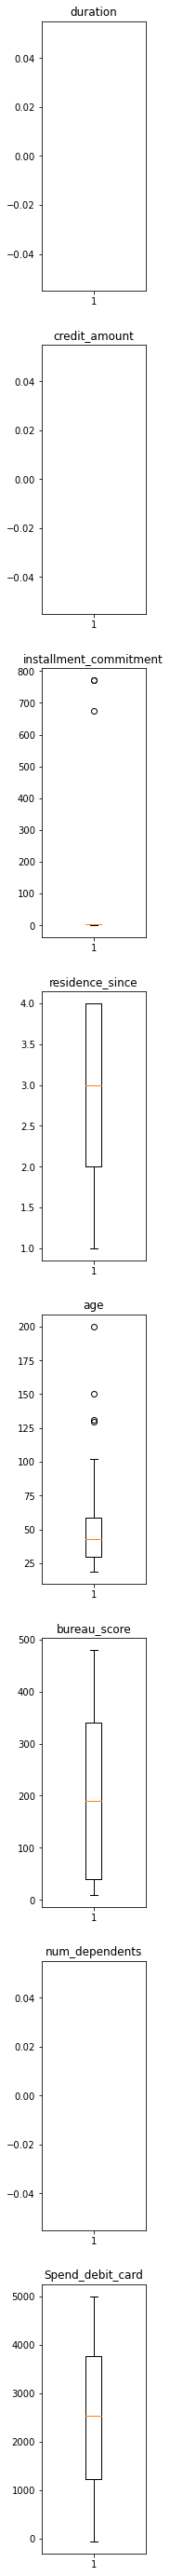

In [15]:
plt.figure(figsize=(2, 50))
for i, col in enumerate(cont_var, 1):
    plt.subplot(len(cont_var),1, i)
    plt.boxplot(df[col])
    plt.title(col)

#### columns: 'installment_commitment' , 'age' has outliers

<AxesSubplot:>

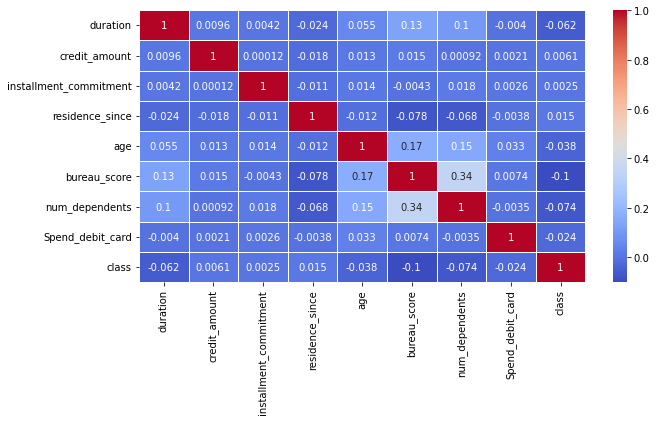

In [16]:
corr_df = df.corr() 
plt.figure(figsize= (10,5))
sns.heatmap(corr_df, cmap = 'coolwarm',linewidths= .5, annot= True)

# none of continous variable columns has any significant effect on target class, no columns has corr. coef >= 0.3 to setup any relation

####  none of continous variable columns has any significant effect on target class, no columns has corr. coef >= 0.3 to setup any relation, so continuous columns can be dropped

In [17]:
# correlation of categorical column with target column
contingency_table = pd.crosstab(df['checking_status'], df['class'])
contingency_table

class,0,1
checking_status,,
0<=X<200,510,791
<0,229,351
>=200,608,1013
no checking,499,1049


In [18]:
chi2 = chi2_contingency(contingency_table)
chi2
# chi_sq = 19.16, and other statistics are p value, degree of freedom, expected frequnecies

(19.160125777979516,
 0.00025332730024232636,
 3,
 array([[ 475.57346535,  825.42653465],
        [ 212.01584158,  367.98415842],
        [ 592.54772277, 1028.45227723],
        [ 565.8629703 ,  982.1370297 ]]))

In [19]:
ctg_var = ['checking_status', 'credit_history','purpose', 'savings_status', 'employment', 'personal_status','other_parties',
           'property_magnitude', 'other_payment_plans', 'housing','job','own_telephone','foreign_worker']

In [20]:
for i in ctg_var:
    contingency_table = pd.crosstab(df[i], df['class'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared coefficient for {i} vs. {'class'}: {chi2}")
    print(f"p_value for {i} vs. {'class'}: {p_value}")
    print('\n')

Chi-squared coefficient for checking_status vs. class: 19.160125777979516
p_value for checking_status vs. class: 0.00025332730024232636


Chi-squared coefficient for credit_history vs. class: 11.282169944821556
p_value for credit_history vs. class: 0.023569315047435927


Chi-squared coefficient for purpose vs. class: 72.72189585144534
p_value for purpose vs. class: 4.4448310115842605e-12


Chi-squared coefficient for savings_status vs. class: 28.618254426494673
p_value for savings_status vs. class: 9.344916869381328e-06


Chi-squared coefficient for employment vs. class: 3.0088623478661667
p_value for employment vs. class: 0.5563434044665798


Chi-squared coefficient for personal_status vs. class: 33.904751516508085
p_value for personal_status vs. class: 2.0750685304818207e-07


Chi-squared coefficient for other_parties vs. class: 32.31607562468987
p_value for other_parties vs. class: 9.608450114883354e-08


Chi-squared coefficient for property_magnitude vs. class: 8.305193024657179
p_

By looking at chi_squared values and p-value we can conclude columns having higher chi-squred values and low p-value < 0.05 have some significant impact on the target variable.
###### columns such as  'employment',  'own_telephone' can be dropped

In [21]:
df = df.drop(columns= cont_var)
df = df.drop(columns = ['employment', 'own_telephone'])


In [22]:
df

,checking_status,credit_history,purpose,savings_status,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,foreign_worker,class
0,<0,critical/other existing credit,business,<100,male div/sep,co applicant,life insurance,stores,for free,unemp/unskilled non res,no,0
1,<0,existing paid,business,<100,male div/sep,co applicant,real estate,bank,for free,unemp/unskilled non res,yes,1
2,<0,critical/other existing credit,business,<100,male div/sep,co applicant,life insurance,bank,for free,unemp/unskilled non res,no,0
3,<0,existing paid,business,<100,male div/sep,co applicant,life insurance,none,for free,skilled,yes,0
4,<0,delayed previously,business,<100,male div/sep,co applicant,no known property,stores,for free,unskilled resident,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5045,no checking,all paid,used car,no known savings,male single,none,life insurance,none,rent,unemp/unskilled non res,no,1
5046,no checking,all paid,used car,500<=X<1000,male div/sep,none,real estate,stores,rent,skilled,no,1
5047,no checking,critical/other existing credit,used car,500<=X<1000,male single,none,no known property,none,NaN,unskilled resident,no,1
5048,no checking,no credits/all paid,used car,<100,male single,none,no known property,bank,rent,unemp/unskilled non res,no,1


### Feature Engineering

#### Question 2 Outlier Analysis

##### As 'installment_commitment' , 'age' has outliers but both doesn't shows any relation with target variable hence we can drop them, but in case of treating outlier we can go with 3 methods ,  
###### 1. remove outlier,  2. retain the outlier, 3.winzorization technique: brings them to a feasible range

In [23]:
# i go with winsorization technique
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5)


In [24]:
# values before winsorization
print(data['installment_commitment'].max())
print(data['age'].max())

772
200


In [25]:
data['installment_commitment'] = winsor.fit_transform(data[['installment_commitment']])
data['age'] = winsor.fit_transform(data[['age']])

In [26]:
print(data['installment_commitment'].max())
print(data['age'].max()


SyntaxError: unexpected EOF while parsing (3168100313.py, line 2)

##### values now belongs in a better range

####  Question 3

##### finding missing values using missing values imputaions ?

#### columns : 'duration', 'credit_amount', 'savings_status', 'employment', 'property_magnitude', 'housing', 'num_dependents' has contatins null values

#### I already dropped continuous columns: 'duration', 'credit_amount', 'num_dependents' due to no coorelation with target columns and 'employment' column because it has less feature importance.

#### But in case we need to deal with missing values we go with mean or median imputation for continuous columns,  mode imputation for categorical columns

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
# for continuous columns
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data["duration"] = pd.DataFrame(mean_imputer.fit_transform(data[["duration"]])) # NA replace with 35.365095
data["credit_amount"] = pd.DataFrame(mean_imputer.fit_transform(data[["credit_amount"]])) # NA replace with 7.294560e+04
data["num_dependents"] = pd.DataFrame(mean_imputer.fit_transform(data[["num_dependents"]])) # NA replace with 6.244101

In [29]:
# for categorical columns
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["savings_status"] = pd.DataFrame(mode_imputer.fit_transform(data[["savings_status"]]))
data["employment"] = pd.DataFrame(mode_imputer.fit_transform(data[["employment"]]))
data["property_magnitude"] = pd.DataFrame(mode_imputer.fit_transform(data[["property_magnitude"]]))
data["'housing"] = pd.DataFrame(mode_imputer.fit_transform(data[["housing"]]))

In [30]:
data.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   8
bureau_score              0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
Spend_debit_card          0
class                     0
'housing                  0
dtype: int64

####  no null values are remaining

In [31]:
df["savings_status"] = pd.DataFrame(mode_imputer.fit_transform(df[["savings_status"]]))
df["property_magnitude"] = pd.DataFrame(mode_imputer.fit_transform(df[["property_magnitude"]]))
df["'housing"] = pd.DataFrame(mode_imputer.fit_transform(df[["housing"]]))
df

,checking_status,credit_history,purpose,savings_status,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,foreign_worker,class,'housing
0,<0,critical/other existing credit,business,<100,male div/sep,co applicant,life insurance,stores,for free,unemp/unskilled non res,no,0,for free
1,<0,existing paid,business,<100,male div/sep,co applicant,real estate,bank,for free,unemp/unskilled non res,yes,1,for free
2,<0,critical/other existing credit,business,<100,male div/sep,co applicant,life insurance,bank,for free,unemp/unskilled non res,no,0,for free
3,<0,existing paid,business,<100,male div/sep,co applicant,life insurance,none,for free,skilled,yes,0,for free
4,<0,delayed previously,business,<100,male div/sep,co applicant,no known property,stores,for free,unskilled resident,no,0,for free
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,no checking,all paid,used car,no known savings,male single,none,life insurance,none,rent,unemp/unskilled non res,no,1,rent
5046,no checking,all paid,used car,500<=X<1000,male div/sep,none,real estate,stores,rent,skilled,no,1,rent
5047,no checking,critical/other existing credit,used car,500<=X<1000,male single,none,no known property,none,NaN,unskilled resident,no,1,own
5048,no checking,no credits/all paid,used car,<100,male single,none,no known property,bank,rent,unemp/unskilled non res,no,1,rent


In [32]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [33]:
df_encoded

,class,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_domestic appliance,purpose_education,...,other_payment_plans_none,other_payment_plans_stores,housing_own,housing_rent,job_skilled,job_unemp/unskilled non res,job_unskilled resident,foreign_worker_yes,'housing_own,'housing_rent
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
5046,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
5047,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
5048,1,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1


# Model Building

#### Question 4: Develop a logistic regression to estimate the relationship between 'class' and the other variables ? 

In [34]:
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Input and Output Split
predictors = df_encoded.loc[:, df_encoded.columns!="class"]
target = df_encoded["class"]

In [36]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train) # Train model into training data

LogisticRegression()

In [38]:
y_pred = model.predict(x_test) # Test model on test data

In [39]:
classification_test = classification_report(y_pred, y_test)
print(classification_test) # Classification report on testing data

              precision    recall  f1-score   support

           0       0.06      0.40      0.11        52
           1       0.95      0.66      0.78       958

    accuracy                           0.65      1010
   macro avg       0.51      0.53      0.44      1010
weighted avg       0.91      0.65      0.75      1010



In [40]:
confusion_matrix(y_test,y_pred)
# out of 345 customer belongs to 0 classs only 21 are predicted correctly

array([[ 21, 324],
       [ 31, 634]], dtype=int64)

In [41]:
accuracy_score(y_test, y_pred)
# model test accuracy is giving 65% accuracy

0.6485148514851485

In [42]:
x_pred = model.predict(x_train) # model prediction on training data

In [43]:
classification_train = classification_report(x_pred, y_train)
print(classification_train) # classification report on training data

              precision    recall  f1-score   support

           0       0.05      0.43      0.09       173
           1       0.96      0.63      0.76      3867

    accuracy                           0.62      4040
   macro avg       0.51      0.53      0.43      4040
weighted avg       0.92      0.62      0.73      4040



In [44]:
confusion_matrix(y_train,x_pred) # out of 1501 customer belongs to 0 class only 75 are classified correctly

array([[  75, 1426],
       [  98, 2441]], dtype=int64)

In [45]:
accuracy_score(x_pred,y_train) # training accuracy of model

0.6227722772277228

We can clearly said, model is biased or underfit as training and test accuracy are low, this model is predicted most customers as good customers / class(1).

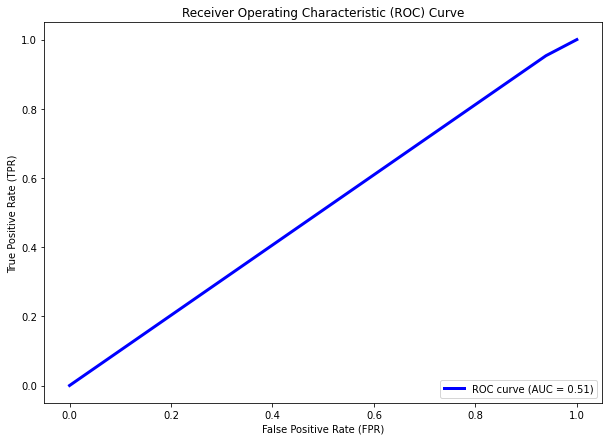

In [46]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=3, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()

From ROC curve which is linear relation between TPR and FPR means model not performing good, so we have to work with some hyperparameters to tune this model. and this issue is might be facing because of data imbalance.
